Course Simulation

In [21]:
import sympy as sy
import numpy as np

In [22]:
#gravity
g = 9.81

#drone parameters
m = 0.851093668 #kg
l = 0.25 #m
kt = 0.0023918   #N/(rad/s)
#moments of inertia in 
Ixx = 0.00716 #kg*m^2
Iyy = 0.00716 #kg*m^2
Izz = 0.02521 #kg*m^2
Ir = 7.92337e-5 #kg*m^2

#efficiency
e = 34.0136 #W/N

#battery energy
E = 32.56*3600  #Watt hours to Joules

T = D

$k_t*(\omega_1^2+\omega_2^2+\omega_3^2+\omega_4^2) = mg$

all w's are the same for hover

$w_0 = \sqrt{(\frac{mg}{4k_t})}$

In [23]:
w0 = (np.sqrt(m*g/(4*kt)))

w1 = w0
w2 = w0
w3 = w0
w4 = w0

In [24]:
tf = 30
#time step
dt = 0.01

#initital conditions
w1 = w0
w2 = w0
w3 = w0
w4 = w0

time = 0

x = 0
y = 0
z = 0

dx = 0
dy = 0
dz = 0

theta = 0 #radian
phi = 0 #radian
psi = 0 #radian

dtheta = 0 #radian/s
dphi = 0 #radian/s
dpsi = 0 #radian/s


#setting lists to append data to with initial conditions
timecount = [time]
xcount = [x]
ycount = [y] 
zcount = [z]
phicount = [phi]
thetacount = [theta]
psicount = [psi]
dxcount = [dx]
dycount = [dy]
dzcount = [dz]
energycount = [E/3600] #convert back to watt hours

#motor speeds for debugging
w1list = [w1]
w2list = [w2]
w3list = [w3]
w4list = [w4]

def EoM(phi, theta, psi, w1, w2, w3, w4):
    #translational EOM
    T = kt*(w1**2+w2**2+w3**2+w4**2) #thrust magnitude

    ddx = -T/m*(np.cos(phi)*np.sin(theta)*np.cos(psi)+np.sin(psi)*np.sin(phi))
    ddy = -T/m*(np.cos(phi)*np.sin(theta)*np.sin(psi)-np.sin(phi)*np.cos(psi))
    ddz = -T/m*np.cos(phi)*np.cos(theta)+g

    #Rotational EOM
    p = dphi - dpsi*np.sin(theta)
    q = dtheta * np.cos(phi) + dpsi*np.cos(theta)*np.sin(phi)
    r = -dtheta*np.sin(phi) + dpsi*np.cos(theta)*np.cos(phi)

    ddphi = (-Ir*q*(w1-w2+w3-w4)+Iyy*q*r-Izz*q*r-kt*l*(w2**2-w4**2))/Ixx
    ddtheta = (Ir*p*(w1-w2+w3-w4)-Ixx*p*r+Izz*p*r+kt*l*(w1**2-w3**2))/Iyy
    ddpsi = (Ixx*p*q-Izz*p*q+kt*(w1**2-w2**2+w3**2-w4**2))/Izz
    return ddx, ddy, ddz, ddphi, ddtheta, ddpsi, T

while time <= tf:

    ddx, ddy, ddz, ddphi, ddtheta, ddpsi, T = EoM(phi, theta, psi, w1, w2, w3, w4)    

    #lift up from ground and hover at 1 m
    t1 = 2.7
    if time < t1:   #lift
        wa = w0 + 0.2
        w1 = wa
        w2 = wa
        w3 = wa
        w4 = wa
    
    t2 = 5.42
    if time > t1 and time < t2: #slow down lift
        w1 = w0-0.2
        w2 = w0-0.2
        w3 = w0-0.2
        w4 = w0-0.2
    

    t3 = 6 #5.42-6
    if time > t2 and time < t3: #hover
        w1 = w0
        w2 = w0
        w3 = w0
        w4 = w0  

    t4 = 6.85
    if time > t3 and time < t4: #speed up and maintain
        w1 = w0-0.01
        w2 = w0
        w3 = w0+0.01
        w4 = w0  

    t5 = 8.35
    if time > t4 and time < t5: #maintain speed
        w1 = w0+0.01
        w2 = w0
        w3 = w0-0.01
        w4 = w0  

    t6 = 11.5
    if time > t5 and time < t6: #maintain speed
        #controller input
        y = 0
        dy = 0
        dz = 0
        theta = 0
        phi = 0
        psi = 0 
        dtheta = 0
        dphi = 0 
        dpsi = 0 

        w1 = w0
        w2 = w0
        w3 = w0
        w4 = w0  

    t7 = 12.6
    if time > t6 and time < t7: #slow down
        w1 = w0+0.02
        w2 = w0
        w3 = w0-0.02
        w4 = w0

    
    t8 =13
    if time > t7 and time < t8: #stop
        #controller input
        dx = 0
        dy = 0
        dz = 0
        theta = 0
        phi = 0
        psi = 0 
        dtheta = 0
        dphi = 0 
        dpsi = 0 

        w1 = w0
        w2 = w0
        w3 = w0
        w4 = w0  

    t9 =15.8
    if time > t8 and time < t9: #turn to the left
        w1 = w0+0.01
        w2 = w0-0.01
        w3 = w0+0.01
        w4 = w0-0.01

    t10 =17.3
    if time > t9 and time < t10: #turn to the left
        w1 = w0-0.01
        w2 = w0+0.01
        w3 = w0-0.01
        w4 = w0+0.01

    t11 = 17.35
    if time > t10 and time < t11: #hover
        #controller input
        y = 0
        dx = 0
        dy = 0
        dz = 0
        theta = 0
        phi = 0
        psi = 2*np.pi/4
        dtheta = 0
        dphi = 0 
        dpsi = 0 

        w1 = w0
        w2 = w0
        w3 = w0
        w4 = w0  
    
    t12 = 18.3
    if time > t11 and time < t12: #speed up and maintain
        w1 = w0-0.01
        w2 = w0
        w3 = w0+0.01
        w4 = w0  

    t13 = 19.5
    if time > t12 and time < t13: #maintain speed
        w1 = w0+0.01
        w2 = w0
        w3 = w0-0.01
        w4 = w0  

    t14 = 22.4
    if time > t13 and time < t14: #maintain speed
        #controller input
        x = 5
        dx = 0
        dz = 0
        theta = 0
        phi = 0
        psi = 2*np.pi/4
        dtheta = 0
        dphi = 0 
        dpsi = 0 

        w1 = w0
        w2 = w0
        w3 = w0
        w4 = w0  

    t15 = 23.5
    if time > t14 and time < t15: #slow down
        #control
        dx = 0

        w1 = w0+0.02
        w2 = w0
        w3 = w0-0.02
        w4 = w0

    
    t16 = 23.9
    if time > t15 and time < t16: #stop
        #controller input
        dx = 0
        dy = 0
        dz = 0
        theta = 0
        phi = 0
        psi = 2*np.pi/4
        dtheta = 0
        dphi = 0 
        dpsi = 0 

        w1 = w0
        w2 = w0
        w3 = w0
        w4 = w0  

    t17 = 26.2
    if time > t16 and time < t17: #decend

        w1 = w0-0.2
        w2 = w0-0.2
        w3 = w0-0.2
        w4 = w0-0.2


    t18 = 30
    if time > t17 and time < t18: #decend
        #controller input

        w1 = w0+0.12
        w2 = w0+0.12
        w3 = w0+0.12
        w4 = w0+0.12

            
    
    #change translational values based on EOM
    dx += ddx*dt
    x += dx*dt + 0.5*ddx*dt**2

    dy+= ddy*dt
    y += dy*dt + 0.5*ddy*dt**2
    
    dz += ddz*dt
    z += dz*dt + 0.5*ddz*dt**2

    #change rotational values based on EOM
    dphi += ddphi*dt
    phi += dphi*dt + 0.5*ddphi*dt**2
    
    dtheta += ddtheta*dt
    theta += dtheta*dt + 0.5*ddtheta*dt**2

    dpsi += ddpsi*dt
    psi += dpsi*dt + 0.5*ddpsi*dt**2

    #energy usage calcation
    E -= e*T*dt

    #increasing time step
    time += dt

    #add data to lists for graph
    timecount.append(round(time, 1))
    zcount.append(z)
    ycount.append(y)
    xcount.append(x)
    phicount.append(phi)
    thetacount.append(theta)
    psicount.append(psi)
    dxcount.append(dx)
    dycount.append(dy)
    dzcount.append(dz)
    energycount.append(E/3600) #convert back to watt hours

    w1list.append(w1)
    w2list.append(w2)
    w3list.append(w3)
    w4list.append(w4)

print("Final Speed: ", dx, dy, dz)

Final Speed:  0.0 0.0 0.0018059259799665709


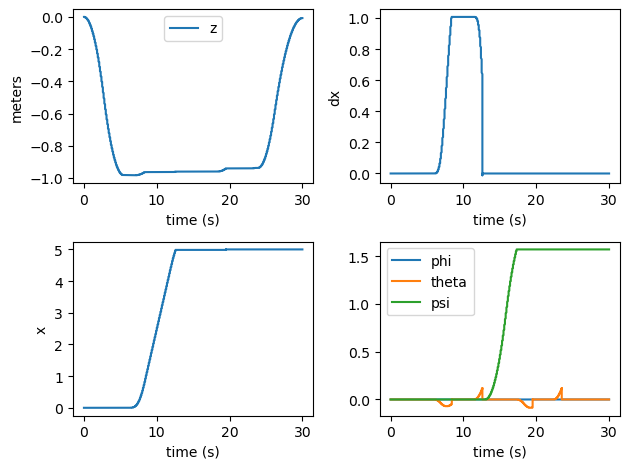

In [25]:
import matplotlib.pyplot as plt
ax1 = plt.subplot2grid((2,2), (0,0)) 
ax1.plot(timecount, zcount, label='z')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('meters')
ax1.legend()

ax2 = plt.subplot2grid((2,2), (0,1)) 
ax2.plot(timecount, dxcount)
ax2.set_xlabel('time (s)')
ax2.set_ylabel('dx')

ax3 = plt.subplot2grid((2,2), (1,0)) 
ax3.plot(timecount, xcount)
ax3.set_xlabel('time (s)')
ax3.set_ylabel('x')

ax4 = plt.subplot2grid((2,2), (1,1)) 
ax4.plot(timecount, phicount, label = 'phi')
ax4.plot(timecount, thetacount, label = 'theta')
ax4.plot(timecount, psicount, label = 'psi')
ax4.legend()
ax4.set_xlabel('time (s)')

plt.tight_layout()


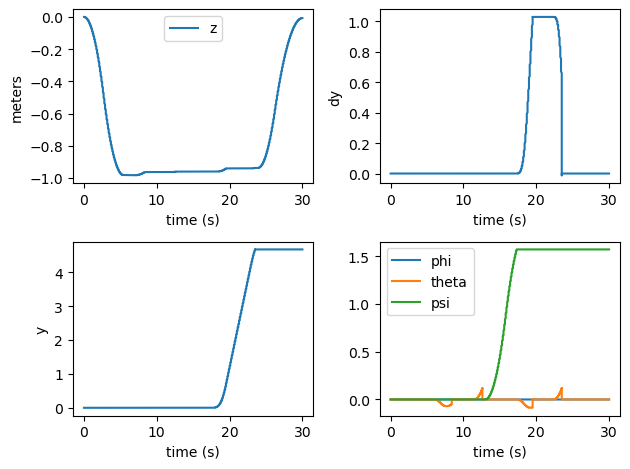

In [26]:
import matplotlib.pyplot as plt
ax1 = plt.subplot2grid((2,2), (0,0)) 
ax1.plot(timecount, zcount, label='z')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('meters')
ax1.legend()

ax2 = plt.subplot2grid((2,2), (0,1)) 
ax2.plot(timecount, dycount)
ax2.set_xlabel('time (s)')
ax2.set_ylabel('dy')

ax3 = plt.subplot2grid((2,2), (1,0)) 
ax3.plot(timecount, ycount)
ax3.set_xlabel('time (s)')
ax3.set_ylabel('y')

ax4 = plt.subplot2grid((2,2), (1,1)) 
ax4.plot(timecount, phicount, label = 'phi')
ax4.plot(timecount, thetacount, label = 'theta')
ax4.plot(timecount, psicount, label = 'psi')
ax4.legend()
ax4.set_xlabel('time (s)')


plt.tight_layout()

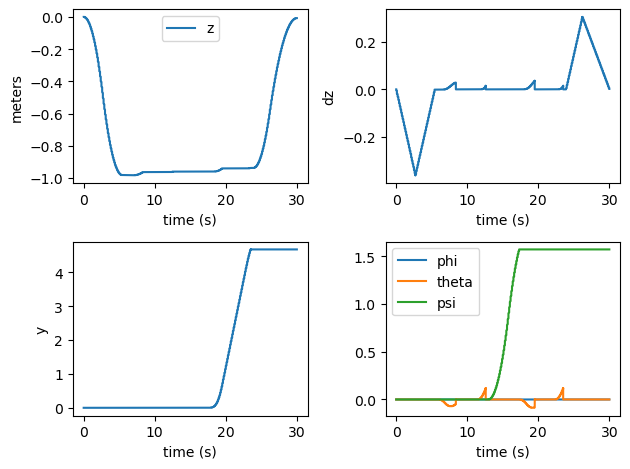

In [27]:
import matplotlib.pyplot as plt
ax1 = plt.subplot2grid((2,2), (0,0)) 
ax1.plot(timecount, zcount, label='z')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('meters')
ax1.legend()

ax2 = plt.subplot2grid((2,2), (0,1)) 
ax2.plot(timecount, dzcount)
ax2.set_xlabel('time (s)')
ax2.set_ylabel('dz')

ax3 = plt.subplot2grid((2,2), (1,0)) 
ax3.plot(timecount, ycount)
ax3.set_xlabel('time (s)')
ax3.set_ylabel('y')

ax4 = plt.subplot2grid((2,2), (1,1)) 
ax4.plot(timecount, phicount, label = 'phi')
ax4.plot(timecount, thetacount, label = 'theta')
ax4.plot(timecount, psicount, label = 'psi')
ax4.legend()
ax4.set_xlabel('time (s)')


plt.tight_layout()

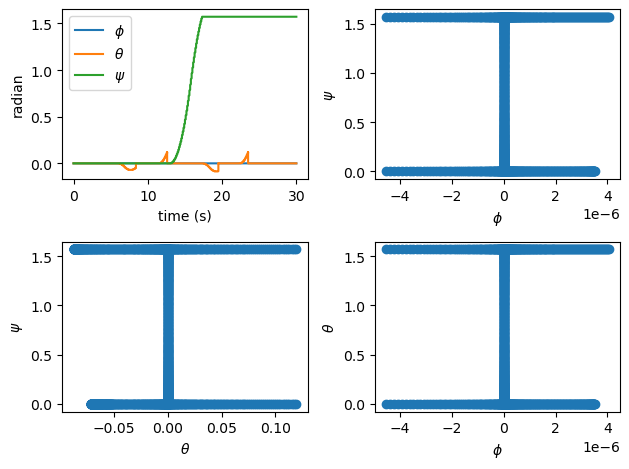

In [28]:
#rotational
ax1 = plt.subplot2grid((2,2), (0,0)) 
ax1.plot(timecount, phicount, label=r'$\phi$')
ax1.plot(timecount, thetacount, label=r'$\theta$')
ax1.plot(timecount, psicount, label=r'$\psi$')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('radian')
ax1.legend()

ax2 = plt.subplot2grid((2,2), (0,1)) 
ax2.plot(phicount, psicount, marker = 'o')
ax2.set_xlabel(r'$\phi$')
ax2.set_ylabel(r'$\psi$')


ax3 = plt.subplot2grid((2,2), (1,0))
ax3.plot(thetacount, psicount, marker = 'o')
ax3.set_xlabel(r'$\theta$')
ax3.set_ylabel(r'$\psi$')

ax4 = plt.subplot2grid((2,2), (1,1)) 
ax4.plot(phicount, psicount, marker = 'o')
ax4.set_xlabel(r'$\phi$')
ax4.set_ylabel(r'$\theta$')

plt.tight_layout()

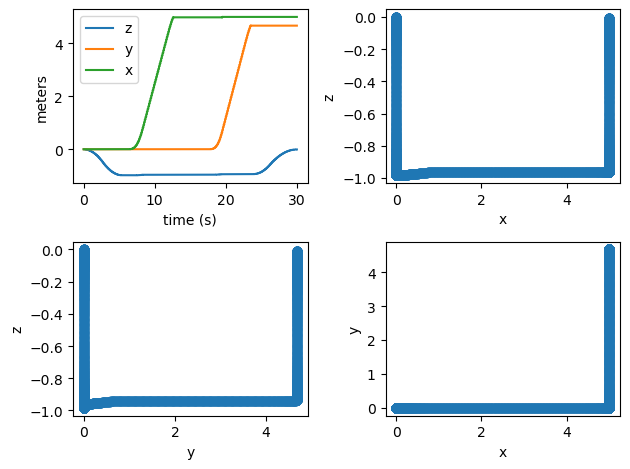

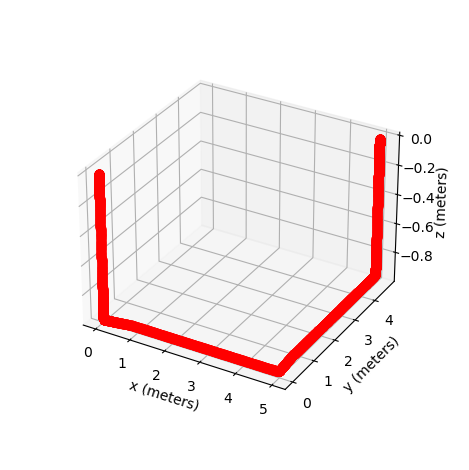

In [29]:
import matplotlib.pyplot as plt
ax1 = plt.subplot2grid((2,2), (0,0)) 
ax1.plot(timecount, zcount, label='z')
ax1.plot(timecount, ycount, label='y')
ax1.plot(timecount, xcount, label='x')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('meters')
ax1.legend()

ax2 = plt.subplot2grid((2,2), (0,1)) 
ax2.plot(xcount, zcount, marker = 'o')
ax2.set_xlabel('x')
ax2.set_ylabel('z')


ax3 = plt.subplot2grid((2,2), (1,0))
ax3.plot(ycount, zcount, marker = 'o')
ax3.set_xlabel('y')
ax3.set_ylabel('z')

ax4 = plt.subplot2grid((2,2), (1,1)) 
ax4.plot(xcount, ycount, marker = 'o')
ax4.set_xlabel('x')
ax4.set_ylabel('y')

plt.tight_layout()

from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(xcount, ycount, zcount, 'red', marker = 'o')
ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
ax.set_zlabel('z (meters)')
ax.set_box_aspect(None, zoom=0.8)
fig. tight_layout()
plt.show()

(0.0, 33.56)

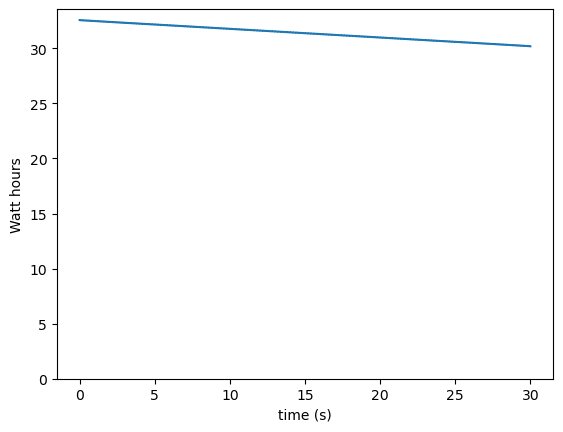

In [30]:
import matplotlib.pyplot as plt
ax1 = plt.subplot2grid((1,1), (0,0)) 
ax1.plot(timecount, energycount)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Watt hours')
ax1.set_ylim(0, energycount[0] + 1)